In [88]:
import calendar
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import sqlite3

All imports, needed for this project, in alphabetical order.

In [89]:
url = "https://api.fortnitetracker.com/v1/profile/account/b7c3c6c66e08499eade89c43f31ea2be/matches"
headers = {'TRN-Api-Key':'07678e9b-0fe4-447b-907d-8d141073f496'}

r = requests.get(url, headers=headers)

Requesting data from the Fortnite TRN match traker API

In [90]:
r

<Response [200]>

Response [200] All is well!

In [91]:
datasnapshot = r.json()
conn = sqlite3.connect('duo_beta_db.db')
JumbData = pd.DataFrame.from_dict(datasnapshot)
JumbData.to_sql("Jumb player data", conn, if_exists = 'append')


In [92]:
#SQL QUERY
query = 'select * from "Jumb Player Data"'

#Python to pull the output of SQL Query into a pandas dataframe(saved as 'games')
games = pd.read_sql(query, conn)

In [93]:
games = games.drop_duplicates(['id'], keep = 'first')

Removing any duplicate files from the data set.

In [94]:
len(games)
games

,index,dateCollected,id,kills,matches,playlist,score,top1,top10,top12,top25,top3,top5,top6,trnRating
0,0,2018-10-20T18:32:28.1830000,888171863,1,2,p9,358,0,0,0,0,0,0,1,1270.2
1,1,2018-10-20T18:32:28.1800000,888171862,4,2,p10,146,0,0,0,0,0,0,0,1193.2
2,2,2018-10-20T17:46:19.8430000,887988136,12,2,p2,494,0,1,0,1,0,0,0,1259.9
3,3,2018-10-20T17:36:12.3630000,887948653,11,8,p2,720,0,0,0,2,0,0,0,1144.9
4,4,2018-10-20T01:50:14.5900000,885504080,0,1,p9,32,0,0,0,0,0,0,0,1351.8
5,5,2018-10-20T01:24:33.6300000,885434996,10,3,p9,896,1,0,0,0,1,0,1,1449.4
6,6,2018-10-20T00:52:43.7470000,885347553,9,7,p9,1173,0,0,0,0,0,0,1,1245.3
7,7,2018-10-20T00:52:43.7170000,885347551,43,11,p10,2157,0,0,3,0,0,3,0,1193.5
8,8,2018-10-18T10:59:08.6030000,879857345,59,29,p2,3676,0,2,0,8,0,0,0,1197.5
9,9,2018-10-18T10:59:08.5870000,879857343,1,2,p10,134,0,0,0,0,0,0,0,1179.2


In [95]:
query = "Select sum(kills) kills, sum(matches) matches, ((sum(kills)/1.0)/sum(matches)) kpm, "\
"CAST(strftime('%w',substr(dateCollected, 0, 11)) as integer) dayofweek, strftime('%W',substr(dateCollected, 0, 11)) weeknumber from 'Jumb player data' group by weeknumber, dayofweek order by weeknumber, dayofweek"

player2 = pd.read_sql(query, conn)

gameweek = {1:0, 2:1, 3:2, 4:3, 5:4, 6:5, 0:6}

for index, row in player2.iterrows():
    weekday = row['dayofweek']
    player2.at[index, 'dayofweek'] = gameweek[weekday]

player2 = player2.sort_values(by=['weeknumber', 'dayofweek'])

In [96]:
player2

,kills,matches,kpm,dayofweek,weeknumber
1,45,25,1.800000,3,41
2,743,376,1.976064,4,41
3,1518,506,3.000000,5,41
0,396,220,1.800000,6,41
4,110,66,1.666667,0,42
5,792,418,1.894737,1,42
6,1584,814,1.945946,3,42
7,1980,792,2.500000,5,42
8,3192,1617,1.974026,1,43
9,1533,1008,1.520833,3,43


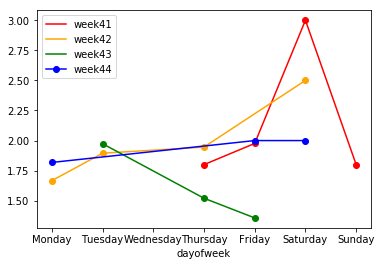

In [97]:
ax = plt.gca()

player2.loc[player2['weeknumber'] == '41'].plot(kind='line', x= 'dayofweek', y='kpm', color='red', marker= 'o', label = "week41", ax=ax)
player2.loc[player2['weeknumber'] == '42'].plot(kind='line', x= 'dayofweek', y='kpm', color='orange', marker= 'o', label = "week42", ax=ax)
player2.loc[player2['weeknumber'] == '43'].plot(kind='line', x= 'dayofweek', y='kpm', color='green', marker= 'o', label = "week43", ax=ax)
player2.loc[player2['weeknumber'] == '44'].plot(kind='line', x= 'dayofweek', y='kpm', color='blue', marker= 'o', label = "week44", ax=ax)
plt.xticks([0, 1, 2, 3, 4, 5, 6],["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])


plt.show()

Best scores are on Saturdays. Least played day is Wednesday. Most played days are Thurday, Friday, and Saturday. As for increased skill as the weeks progress there doesn't seem to be enough information to to give a clear answer or just not enough growth to really determine.